- **Image Representation:**
  - Pixels: Collection of picture elements.
  - Grayscale Image:
    - 2D array with x and y coordinates.
    - Values: Float (0.0 to 1.0) or integer (0 to 255) for grayness level.
    - Example: Value 255 at (0,0) makes the top-left pixel white.
  - Color Images:
    - 3rd axis for red, green, and blue components.
    - Each component: 0.0 to 1.0 or 0 to 255.
    - Combinations yield 16.7 million colors.
  
- **Processing Images with NumPy:**
  - Importing Libraries:
    ```python
    import matplotlib.pyplot as plt
    import numpy as np
    ```

  - Loading Image:
    ```python
    painting = plt.imread("painting.png")
    ```

  - Checking Image Shape:
    ```python
    print(painting.shape)  # Output: (368, 640, 3)
    print(f"The image consists of {painting.shape[0] * painting.shape[1]} pixels")
    ```

  - Displaying Image:
    ```python
    plt.imshow(painting);
    ```

- **Image Operations with NumPy:**
  - Mirroring Image in X-direction:
    ```python
    plt.imshow(painting[:, ::-1]);
    ```

  - Setting Pixels on the First 30 Rows to White:
    ```python
    painting2 = painting.copy()
    painting2[0:30, :, :] = 1.0
    plt.imshow(painting2);
    ```

  - Creating a Function for Fading to Black:
    ```python
    def fadex(image):
        height, width = image.shape[:2]
        m = np.linspace(0, 1, width).reshape(1, width, 1)
        result = image * m  # Broadcasting used
        return result
    
    modified = fadex(painting)
    print(modified.shape)
    plt.imshow(modified);
    ```
  
In summary, images can be represented as arrays, allowing easy manipulation using NumPy functions. Examples include mirroring, setting pixel values, and creating functions for complex operations like fading to black.

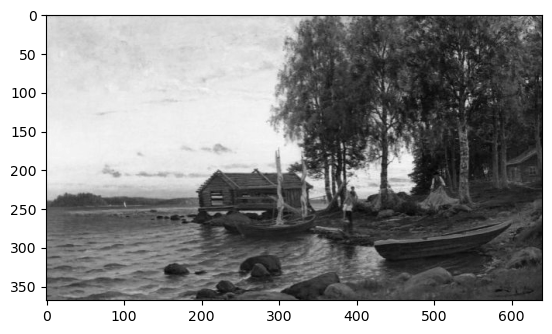

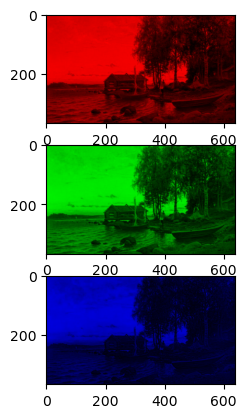

In [34]:
"""
Exercise 3.11 (to grayscale)
This exercise can give two points at maximum!

Part 1:

Write a function to_grayscale that takes an RGB image (three dimensional array) and 
returns a two dimensional gray-scale image. 

The conversion to gray-scale should take a weighted sum of the red, green, and blue values, and 
use that as the value of gray. 
The first axis is the x, the second is y, and the third is the color components (red, green, blue). 

Use the weights 0.2126, 0.7152, and 0.0722 for red, green, and blue, respectively. 
These weights are so because the human eye is most sensitive to green color and least sensitive to blue color.

In the main function you can, for example, use the provided image src/painting.png. 
Display the grayscale image with the plt.imshow function. 
You may have to call the function plt.gray to set the color palette (colormap) to gray. 
(See help(plt.colormaps) for more information about colormaps.)

Part 2:

Write functions to_red, to_green, and to_blue that get a three dimensional array as a parameter and 
return a three dimensional arrays. 

For instance, the function to_red should zero out the green and blue color components and return the result.

In the main function create a figure with three subfigures: 

the top one should be the red image, the middle one the green image, and the bottom one the blue image.
"""
import numpy as np
import matplotlib.pyplot as plt

def to_red(image_array):
    # zeroes out green, blue
    image_array[:, :, [1,2]] = 0

    return image_array

def to_green(image_array):
    # zeroes out red, blue
    image_array[:, :, [0,2]] = 0
    return image_array
    
def to_blue(image_array):
    # zeroes out green, red
    image_array[:, :, [ 0, 1]] = 0
    return image_array

def to_grayscale(image_array):
    # gray_scale image
    # red, green, blue is weight sum that transform into grayscale image
    gray_image = 0.2126 * image_array[:, :, 0] + 0.7152 * image_array[:, :, 1] + 0.0722 * image_array[:, :, 2]

    return gray_image
def main():
    image_array = plt.imread("part03-e11_to_grayscale/src/painting.png")
    gray_image = to_grayscale(image_array)
    plt.gray()
    plt.imshow(gray_image)

    # top red, middle green, bottom blue
    row, column = 3, 1
    fig, ax = plt.subplots(row, column)
    red_image = image_array.copy()
    red_image = to_red(red_image)
    ax[0].imshow(red_image) # top row red image
    green_image = image_array.copy()
    ax[1].imshow(to_green(green_image)) # middle row green image
    blue_image = image_array.copy()
    ax[2].imshow(to_blue(blue_image)) # bottom row blue image
    plt.show()

"""
def to_grayscale(image):
    w=np.array([0.2126, 0.7152, 0.0722]).reshape(1, 1, 3)
    a = image * w
    return a.sum(axis=2)
 
def to_red(image):
    image2=image.copy()
    image2[:,:,[1,2]] = 0
    return image2
 
def to_green(image):
    image2=image.copy()
    image2[:,:,[0,2]] = 0
    return image2
 
def to_blue(image):
    image2=image.copy()
    image2[:,:,[0,1]] = 0
    return image2
 
def main():
    painting=plt.imread("src/painting.png")
    gray = to_grayscale(painting)
    red = to_red(painting)
    green = to_green(painting)
    blue = to_blue(painting)
    plt.imshow(painting)
    plt.figure()
    plt.gray()
    plt.imshow(gray)
    plt.subplot(3, 1, 1)
    plt.imshow(red)
    plt.subplot(3, 1, 2)
    plt.imshow(green)
    plt.subplot(3, 1, 3)
    plt.imshow(blue)
    plt.show()
"""

main()